# <h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 40px; color: #2D2926; text-align: center; line-height: 0.55;"><b>Telco Customer Churn Classification</b><br></h1>



### Problem Statement :

In the telecom industry, customers are able to choose from a pool of companies to cater their needs regarding communication and internet. Customers are very critical about the kind of services they receive and judge the enitre company based on a single experience! These communication services have become so recurrent and inseparable from the daily routine that a 30 minute maintenance break kicks in anxiety in the users highlighting our taken-for-granted attitude towards these services! Coupled with high customer acquisation costs, churn analysis becomes very pivotal! Churn rate is a metric that describes the number of customers that cancelled or did not renew their subscription with the company. Thus, higher the churn rate, more customers stop buying from your business, directly affecting the revenue! Hence, based on the insights gained from the churn analysis, companies can build strategies, target segments, improve the quality of the services being provided to improve the customer experience, thus cultivating trust with the customers. That is why building predictive models and creating reports of churn analysis becomes key that paves the way for growth! 

### Aim :
- To classify the potential churn customers based on numerical and categorical features.
- It is a **binary classification** problem for an imbalanced dataset.

### <center>Dataset Attributes</center>
    
- **customerID** : Customer ID
- **gender** : Whether the customer is a male or a female
- **SeniorCitizen** : Whether the customer is a senior citizen or not (1, 0)
- **Partner** : Whether the customer has a partner or not (Yes, No)
- **Dependents** : Whether the customer has dependents or not (Yes, No)
- **tenure** : Number of months the customer has stayed with the company
- **PhoneService** : Whether the customer has a phone service or not (Yes, No)
- **MultipleLines** : Whether the customer has multiple lines or not (Yes, No, No phone service)
- **InternetService** : Customer’s internet service provider (DSL, Fiber optic, No)
- **OnlineSecurity** : Whether the customer has online security or not (Yes, No, No internet service)
- **OnlineBackup** : Whether the customer has online backup or not (Yes, No, No internet service)
- **DeviceProtection** : Whether the customer has device protection or not (Yes, No, No internet service)
- **TechSupport** : Whether the customer has tech support or not (Yes, No, No internet service)
- **StreamingTV** : Whether the customer has streaming TV or not (Yes, No, No internet service)
- **StreamingMovies** : Whether the customer has streaming movies or not (Yes, No, No internet service)
- **Contract** : The contract term of the customer (Month-to-month, One year, Two year)
- **PaperlessBilling** : Whether the customer has paperless billing or not (Yes, No)
- **PaymentMethod** : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- **MonthlyCharges** : The amount charged to the customer monthly
- **TotalCharges** : The total amount charged to the customer
- **Churn** : Whether the customer churned or not (Yes or No)

# <center><div style="font-family: Trebuchet MS; color: #2D2926; padding: 12px; line-height: 1;">Dataset Information</div></center>

### Import the Necessary Libraries :

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [67]:
data = pd.read_csv('Latest_data.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Info :

In [68]:
data.shape

(7043, 21)

In [69]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


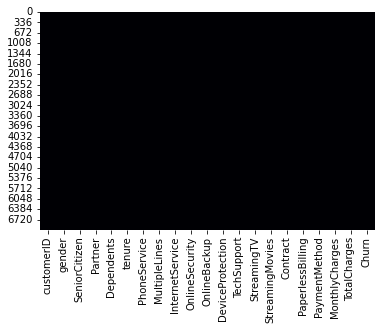

In [71]:
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);

- **No null values** present in the data!

In [72]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.00,0.16,0.37,0.00,0.00,0.00,0.00,1.00
tenure,7043.00,32.37,24.56,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.00,64.76,30.09,18.25,35.50,70.35,89.85,118.75


In [73]:
l1 = [len(i.split()) for i in data['TotalCharges']]
l2 = [i for i in range(len(l1)) if l1[i] != 1]
print('Index Positions with empty spaces : ',*l2)

data.drop(index=l2, inplace=True)
#for i in l2:
    #print(data.loc[i])
    #data.loc[i , 'TotalCharges'] = data.loc[i , 'tenure'] * data.loc[i , 'MonthlyCharges']
    
data['TotalCharges'] = data['TotalCharges'].astype(float)
data.drop(columns = ['customerID'], inplace = True)

print("After dropping", data.shape)

Index Positions with empty spaces :  488 753 936 1082 1340 3331 3826 4380 5218 6670 6754
After dropping (7032, 20)


- While converting the **TotalCharges** to float, an error occurred with the message describing that it could not convert string to float.
    - **E.g** : a = ' ' 
- Drop these rows.
- Drop the **customerID** column as well cause they dont convey anything

In [74]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1 = data.copy(deep = True)
text_data_features = [i for i in list(data.columns) if i not in list(data.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features :
    df1[i] = le.fit_transform(df1[i])
    print(i , ' : ' , df1[i].unique() , ' = ' , le.inverse_transform(df1[i].unique()))
df2 = df1.copy(deep = True)

Label Encoder Transformation
gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]  =  ['No' 'Yes']


In [75]:
df1.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00
mean,0.50,0.16,0.48,0.30,32.42,0.90,0.94,0.87,0.79,0.91,0.90,0.80,0.98,0.99,0.69,0.59,1.57,64.80,2283.30,0.27
std,0.50,0.37,0.50,0.46,24.55,0.30,0.95,0.74,0.86,0.88,0.88,0.86,0.89,0.89,0.83,0.49,1.07,30.09,2266.77,0.44
min,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.25,18.80,0.00
25%,0.00,0.00,0.00,0.00,9.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,35.59,401.45,0.00
50%,1.00,0.00,0.00,0.00,29.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,2.00,70.35,1397.47,0.00
75%,1.00,0.00,1.00,1.00,55.00,1.00,2.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,1.00,2.00,89.86,3794.74,1.00
max,1.00,1.00,1.00,1.00,72.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,118.75,8684.80,1.00


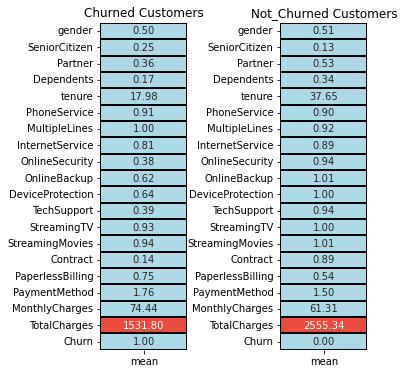

In [76]:
colors = ['#ADD8E6','#E94B3C']

churn = df1[df1['Churn'] == 1].describe().T
not_churn = df1[df1['Churn'] == 0].describe().T

fig , ax = plt.subplots(nrows = 1 , ncols = 2 , figsize = (5 , 5))
plt.subplot(1 , 2 , 1)
sns.heatmap(churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Churned Customers');

plt.subplot(1 , 2 , 2)
sns.heatmap(not_churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Not_Churned Customers');

fig.tight_layout(pad = 0)

- **Mean** values of all the features for churned and not-churned customers.
- Clearly, the customers that churned had a low mean **tenure** of **17.98** months as compared to those who continued with an average **tenure** period of **37.65** months. 
- Mean values of **OnlineSecurity**, **OnlineBackup**, **DeviceProtection** and **TechSupport** are higher for not-churned customers than churn customers.
- Churned customer's **Contract** value is much smaller than those of not-churned customers.
- Mean **MonthlyCharges** of the churn customers, **74.44**, is more than that of not-churn customers, **61.31**.
- Not-churned customers **TotalCharges**, **2555.34**, is higher than churn customers, **1531.80**.
- The dataset has too many categorical features, hence mean values of the features are present in the vicinity of 0.

In [77]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


# <center><div style="font-family: Trebuchet MS; color: #2D2926; padding: 12px; line-height: 1;">Exploratory Data Analysis</div></center>

### Dividing features into Numerical and Categorical :

In [78]:
col = list(df1.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :' , *categorical_features)
print('Numerical Features :' , *numerical_features)

Categorical Features : gender SeniorCitizen Partner Dependents PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod Churn
Numerical Features : tenure MonthlyCharges TotalCharges


### Target Variable Visualization (Churn) : 

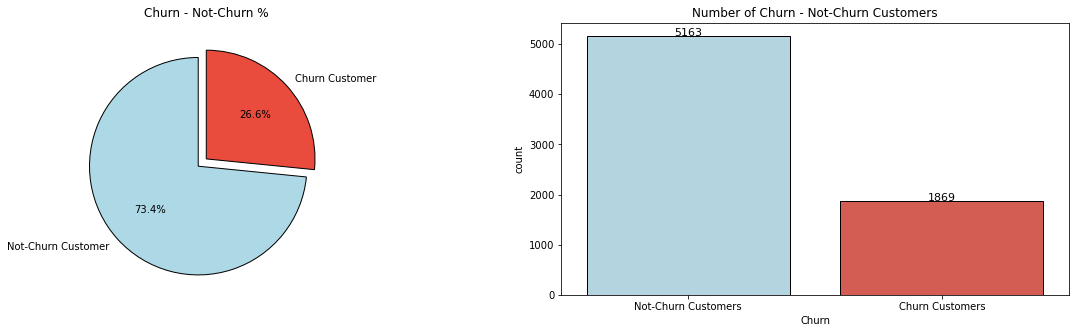

In [79]:
l = list(df1['Churn'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['Not-Churn Customer','Churn Customer'],autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Churn - Not-Churn %');

plt.subplot(1,2,2)
ax = sns.countplot('Churn',data = data,palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Not-Churn Customers','Churn Customers'])
    
plt.title('Number of Churn - Not-Churn Customers');
plt.show()

- The dataset is **unbalanced** in a near about **3 : 1** ratio for **Not-Churn : Churn** customers!
- Due to this, predictions will be biased towards **Not-Churn** customers.

### Categorical Features vs Target Variable (Churn):

In [80]:
categorical_features.remove('Churn')

- We will remove **Churn**, target variable, from the categorical features list for visualization purposes.

In [81]:
l1 = ['gender','SeniorCitizen','Partner','Dependents'] # Customer Information
l2 = ['PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies',
      'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'] # Services Signed Up for!
l3 = ['Contract','PaperlessBilling','PaymentMethod'] # Payment Information

#### Group 1 : Customer Information : 
#### gender | SeniorCitizen | Partner | Dependents |

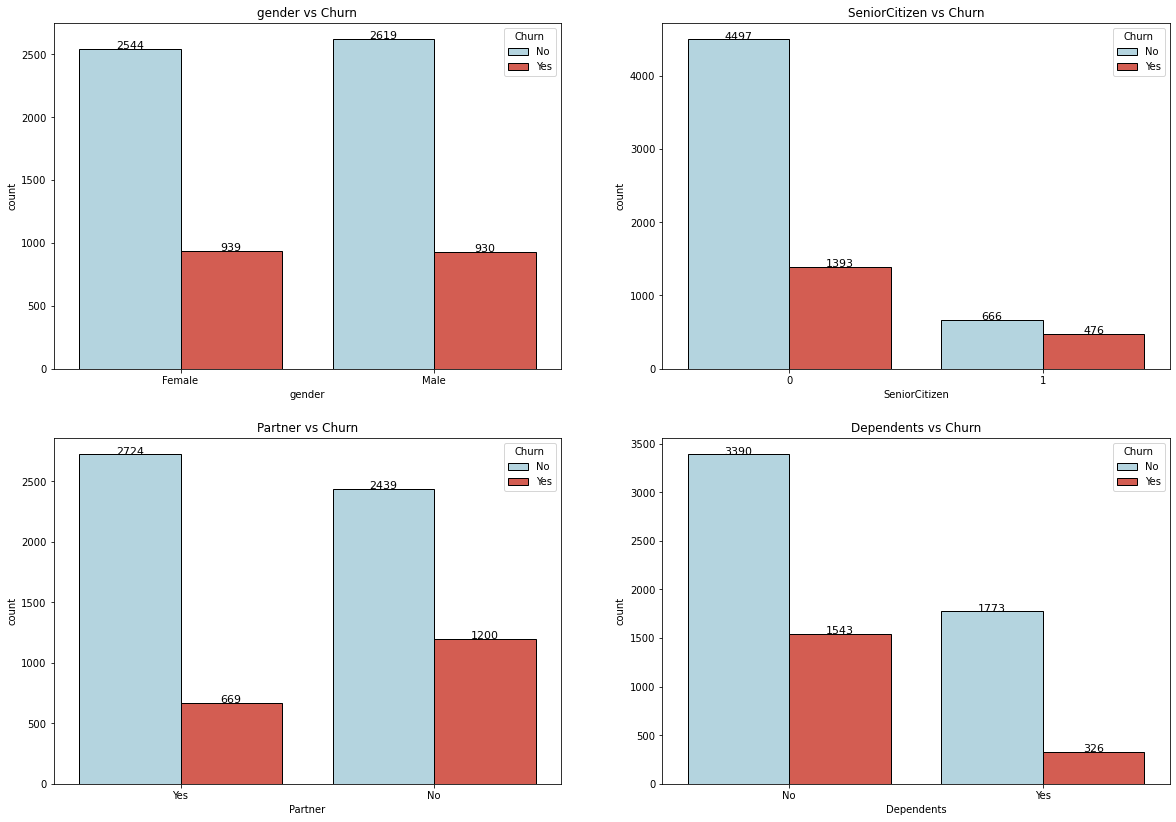

In [82]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l1)):
    plt.subplot(2 , 2 , i + 1)
    ax = sns.countplot(l1[i] , data = data , hue = "Churn" , palette = colors , edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2 , rect.get_height() + 2 , rect.get_height() , horizontalalignment = 'center' , fontsize = 11)
    title = l1[i] + ' vs Churn'
    plt.title(title);

- Customer churning for **male** & **female** customers is very similar to each other!
- Similarly, number of **SeniorCitizen** customers is pretty low! Out of that, nearly about 40% churn are **SeniorCitizen** customers. It accounts for a total of 476 customers out of 1142 **Senior Citizen** customers.
- Customers who are housing with a **Partner** churned less as compared to those not living with a **Partner**.
- Similary, churning is high for the customers that don't have **Dependents** with them!

#### Group 2: Services Subscribed by the Customer :

#### PhoneService | MultipleLines | InternetService | StreamingTV | StreamingMovies |

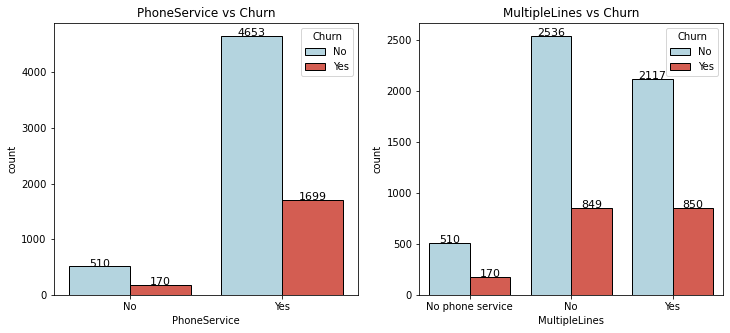

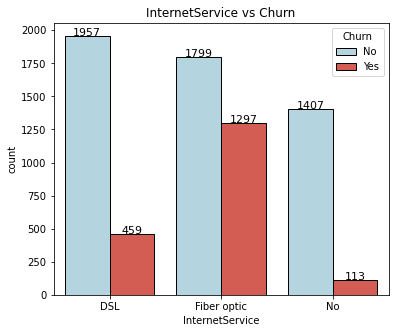

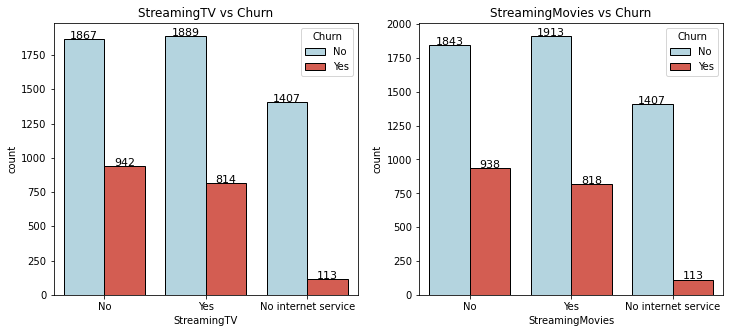

In [83]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[0:2])):
    plt.subplot(1 , 2 , i + 1)
    ax = sns.countplot(l2[i],data = data,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l2[i] + ' vs Churn'
    plt.title(title);

fig = plt.subplots(nrows = 1, ncols = 1, figsize = (6,5))

plt.subplot(1,1,1)
ax = sns.countplot(l2[2],data = data,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l2[2] + ' vs Churn'
plt.title(title);
    
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[3:5])):
    plt.subplot(1,2,i + 1)
    ax = sns.countplot(l2[i + 3],data = data,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l2[i + 3] + ' vs Churn'
    plt.title(title);

- For **PhoneService**, despite having no phone service, more customers were retained as compared to the number of customers who dropped the services.
- In case of **MultipleLines**, churn rate in when the **Multiplelines** are present or not is the same. 
- A high number of customers have displayed their resistance towards the use of **Fiber optic** cables for providing the **InternetService**. On the contrary, from the above graph, customers prefer using **DSL** for their **InternetService**!
- **StreamingTV** and **StreamingMovies** display an identical graph. Irrespective of being subscribed to **StreamingTV** & **StreamingMovies**, a lot of customers have been churned.

#### Group 2: Services Subscribed by the Customer : 
#### OnlineSecurity | OnlineBackup | DeviceProtection | TechSupport |

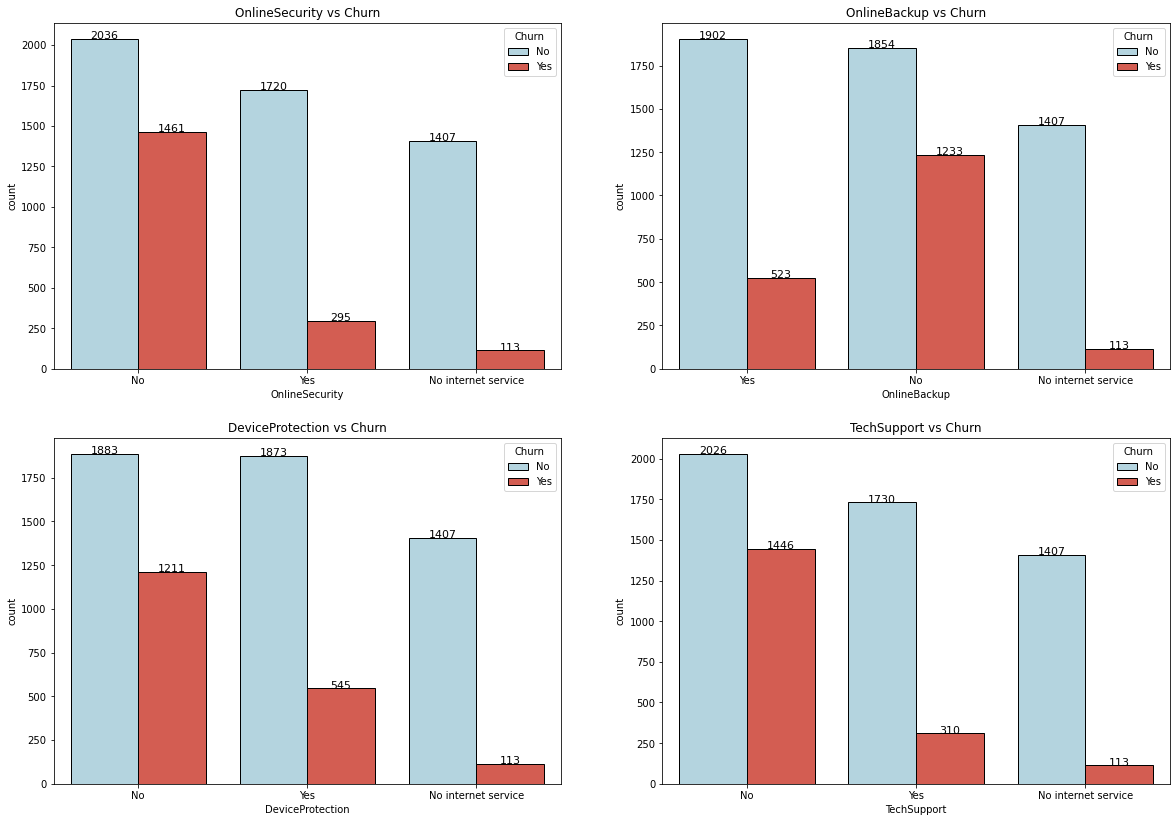

In [84]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l2[-4:])):
    plt.subplot(2,2,i + 1)
    ax = sns.countplot(l2[-4 + i],data = data,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l2[-4 + i] + ' vs Churn'
    plt.title(title);

- When it comes down to catering the customers, services w.r.t **OnlineSecurity**, **OnlineBackup**, **DeviceProtection** & **TechSupport** are crucial from the above visualizations! 
- A high number of customers have switched their service provider when it comes down poor services with the above mentioned features.

#### Group 3 : Contract | PaperlessBilling | PaymentMethod |

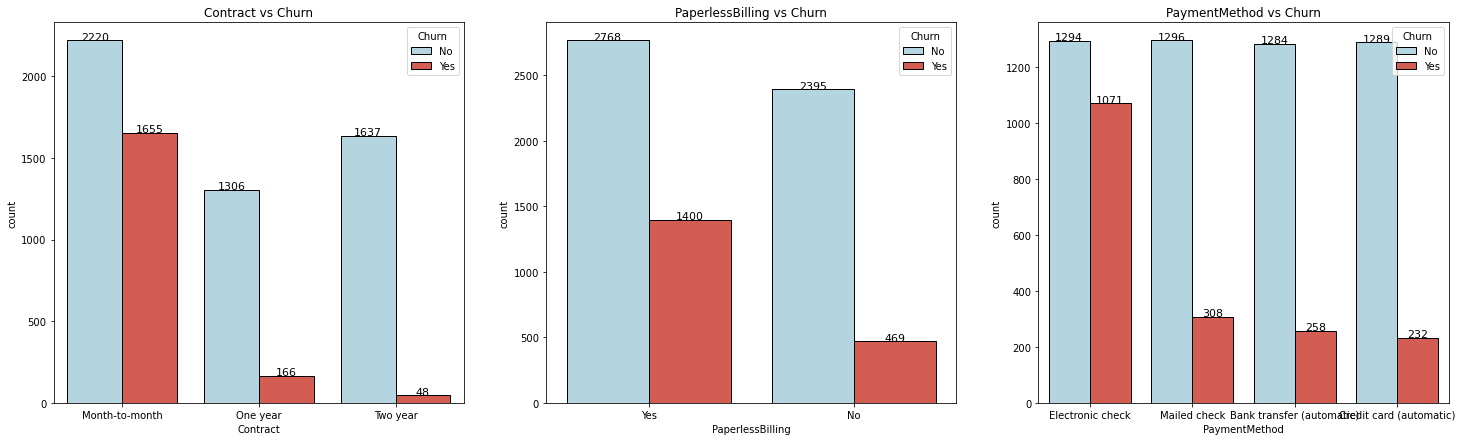

In [85]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25 , 7))

plt.subplot(1,3,1)
ax = sns.countplot(l3[0],data = data,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l3[0] + ' vs Churn'
plt.title(title);

plt.subplot(1,3,2)
ax = sns.countplot(l3[1],data = data,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l3[1] + ' vs Churn'
plt.title(title);

plt.subplot(1,3,3)
ax = sns.countplot(l3[2],data = data,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l3[2] + ' vs Churn'
plt.title(title);

- Customer churning for a **Month-to-Month** based **Contract** is quite high. This is probably because the customers are testing out the varied services available to them and hence, in order to save money, 1 month service is tested out!
- Another reason can be the overall experience with the internet service, streaming service and phone service were not consistent. Every customer has a different priority and hence if one of the 3 was upto par, the entire service was cutoff!
- **PaperlessBilling** displays a high number of customers being churned out. This is probably because of some payment issue or receipt issues.
- Customers clearly resented the **Electronic check** **PaymentMethod**. Out of the **2365** number of bills paid using **Electronic check**, a staggering 1071 customers exited the pool of service due to this payment method.

### Categorical Features vs Positive Target Variable (Churn Cases) :

- **We will now point our attention directly towards to the churn customers!**

#### Group 1 : Customer Information : 
#### gender | SeniorCitizen | Partner | Dependents |

In [86]:
gender = df1[df1['Churn'] == 1]['gender'].value_counts()
gender = [gender[0] / sum(gender) * 100, gender[1] / sum(gender) * 100] # Female / Male

seniorcitizen = df1[df1['Churn'] == 1]['SeniorCitizen'].value_counts()
seniorcitizen = [seniorcitizen[0] / sum(seniorcitizen) * 100,seniorcitizen[1] / sum(seniorcitizen) * 100] # No - Yes

partner = df1[df1['Churn'] == 1]['Partner'].value_counts()
partner = [partner[0] / sum(partner) * 100,partner[1] / sum(partner) * 100] # No - Yes

dependents = df1[df1['Churn'] == 1]['Dependents'].value_counts()
dependents = [dependents[0] / sum(dependents) * 100,dependents[1] / sum(dependents) * 100] # No - Yes

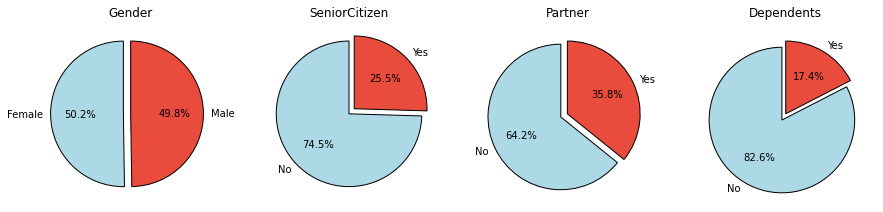

In [87]:
ax,fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))

plt.subplot(1,4,1)
plt.pie(gender,labels = ['Female','Male'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Gender');

plt.subplot(1,4,2)
plt.pie(seniorcitizen,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('SeniorCitizen');

plt.subplot(1,4,3)
plt.pie(partner,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Partner');

plt.subplot(1,4,4)
plt.pie(dependents,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Dependents');

- We can observe a clear cut **50% - 50%** split between the **male** and **female** customers that have switched their services. Hence, the reason for switching is something related to the service or some process which the customers reacted badly!
- **75%** of the churned customers are **not SeniorCitizen**!
- Customers living by themselves have cutoff the services. From **Partners** & **Dependents** data, average of **73.4%** of customers churned out were living by themselves.

#### Group 2: Services Subscribed by the Customer :

#### PhoneService | MultipleLines | InternetService | StreamingTV | StreamingMovies |

In [88]:
phoneservice = df1[df1['Churn'] == 1]['PhoneService'].value_counts()
phoneservice = [phoneservice[0] / sum(phoneservice) * 100, phoneservice[1] / sum(phoneservice) * 100] # No - Yes

multiplelines = df1[df1['Churn'] == 1]['MultipleLines'].value_counts()
multiplelines = [multiplelines[0] / sum(multiplelines) * 100,multiplelines[1] / sum(multiplelines) * 100, multiplelines[2] / sum(multiplelines) * 100] # No - No Phone Service - Yes 

internetservice = df1[df1['Churn'] == 1]['InternetService'].value_counts()
internetservice = [internetservice[0] / sum(internetservice) * 100,internetservice[1] / sum(internetservice) * 100, internetservice[2] / sum(internetservice) * 100] # DSL - Fiber Optic - No 

streamingtv = df1[df1['Churn'] == 1]['StreamingTV'].value_counts()
streamingtv = [streamingtv[0] / sum(streamingtv) * 100,streamingtv[1] / sum(streamingtv) * 100, streamingtv[2] / sum(streamingtv) * 100] # No - No Internet Service - Yes 

streamingmovies = df1[df1['Churn'] == 1]['StreamingMovies'].value_counts()
streamingmovies = [streamingmovies[0] / sum(streamingmovies) * 100,streamingmovies[1] / sum(streamingmovies) * 100, streamingmovies[2] / sum(streamingmovies) * 100] # No - No Internet Service - Yes 

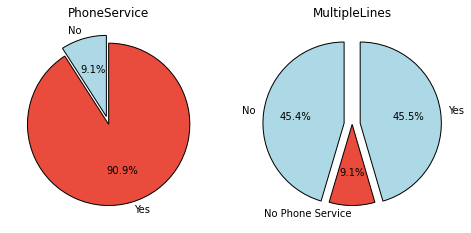

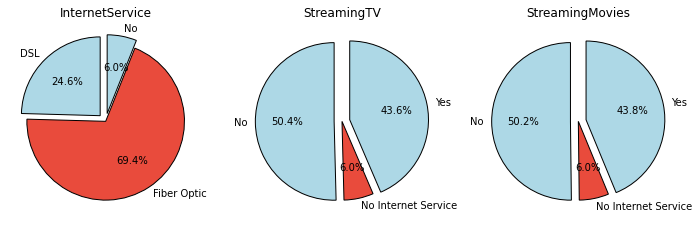

In [89]:
ax,fig = plt.subplots(nrows = 1,ncols = 2,figsize = (8,8))

plt.subplot(1,2,1)
plt.pie(phoneservice,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PhoneService');

plt.subplot(1,2,2)
plt.pie(multiplelines,labels = ['No','No Phone Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('MultipleLines');

ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (12,12))

plt.subplot(1,3,1)
plt.pie(internetservice,labels = ['DSL', 'Fiber Optic','No'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('InternetService');

plt.subplot(1,3,2)
plt.pie(streamingtv,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('StreamingTV');

plt.subplot(1,3,3)
plt.pie(streamingmovies,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('StreamingMovies');

- Despite providing **PhoneService**, a high percentage of customers have switched!
- Similarly, availability of **MultipleLines** did not matter, as customer unsubscription was carried out regardless!
- Customers did not like the approach of **Fiber Optic** cables for providing **InternetService** with 70% opting out from the services!
- For **StreamingTV** & **StreamingMovies**, customers without these services definitely cancelled their subscription, however an average of **43.7%** of customers switched despite consuming the streaming content.

#### Group 2: Services Subscribed by the Customer : 
#### OnlineSecurity | OnlineBackup | DeviceProtection | TechSupport |

In [90]:
onlinesecurity = df1[df1['Churn'] == 1]['OnlineSecurity'].value_counts()
onlinesecurity = [onlinesecurity[0] / sum(onlinesecurity) * 100,onlinesecurity[1] / sum(onlinesecurity) * 100, onlinesecurity[2] / sum(onlinesecurity) * 100] # No - No Internet Service - Yes 

onlinebackup = df1[df1['Churn'] == 1]['OnlineBackup'].value_counts()
onlinebackup = [onlinebackup[0] / sum(onlinebackup) * 100,onlinebackup[1] / sum(onlinebackup) * 100, onlinebackup[2] / sum(onlinebackup) * 100] # No - No Internet Service - Yes 

deviceprotection = df1[df1['Churn'] == 1]['DeviceProtection'].value_counts()
deviceprotection = [deviceprotection[0] / sum(deviceprotection) * 100,deviceprotection[1] / sum(deviceprotection) * 100, deviceprotection[2] / sum(deviceprotection) * 100] # No - No Internet Service - Yes 

techsupport = df1[df1['Churn'] == 1]['TechSupport'].value_counts()
techsupport = [techsupport[0] / sum(techsupport) * 100,techsupport[1] / sum(techsupport) * 100, techsupport[2] / sum(techsupport) * 100] # No - No Internet Service - Yes 

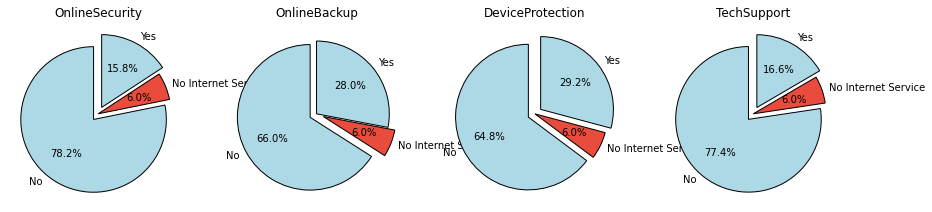

In [91]:
ax,fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))

plt.subplot(1,4,1)
plt.pie(onlinesecurity,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineSecurity');

plt.subplot(1,4,2)
plt.pie(onlinebackup,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineBackup');

plt.subplot(1,4,3)
plt.pie(deviceprotection,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('DeviceProtection');

plt.subplot(1,4,4)
plt.pie(techsupport,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('TechSupport');

- Above pie charts point out the significance of providing **OnlineSecurity**, **OnlineBackup**, **DeviceProtection** & **TechSupport** as an average of **71.6%** customers cutoff their services due to lack of these features!

#### Group 3 : Contract | PaperlessBilling | PaymentMethod |

In [92]:
contract = df1[df1['Churn'] == 1]['Contract'].value_counts()
contract = [contract[0] / sum(contract) * 100, contract[1] / sum(contract) * 100, contract[2] / sum(contract) * 100] # Month-to-month - One year - Two year

paperlessbilling = df1[df1['Churn'] == 1]['PaperlessBilling'].value_counts()
paperlessbilling = [paperlessbilling[0] / sum(paperlessbilling) * 100,paperlessbilling[1] / sum(paperlessbilling) * 100] # No - Yes 

paymentmethod = df1[df1['Churn'] == 1]['PaymentMethod'].value_counts()
paymentmethod = [paymentmethod[0] / sum(paymentmethod) * 100, paymentmethod[1] / sum(paymentmethod) * 100, 
            paymentmethod[2] / sum(paymentmethod) * 100, paymentmethod[3] / sum(paymentmethod) * 100] 
            # Bank Transfer (automatic) - Credit Card (automatic) - Electronic check - Mailed check

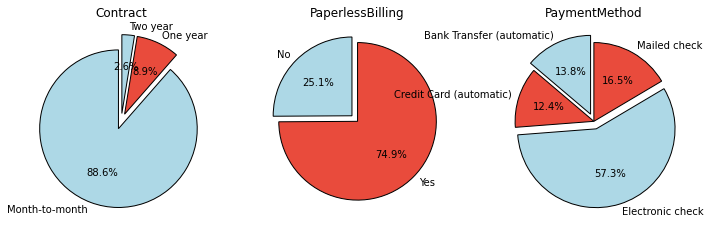

In [93]:
ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (12,12))

plt.subplot(1,3,1)
plt.pie(contract,labels = ['Month-to-month','One year','Two year'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0.1,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Contract');

plt.subplot(1,3,2)
plt.pie(paperlessbilling,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PaperlessBilling');

plt.subplot(1,3,3)
plt.pie(paymentmethod,labels = ['Bank Transfer (automatic)','Credit Card (automatic)','Electronic check','Mailed check'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PaymentMethod');

- **Month-to-Month** **Contract** duration has the dominating share when it comes churning with a **88.6%** customers!
- **PaperlessBilling** does not seem to be liked by the customers!
- **Electronic check** definitely needs to be checked as it accounts for **57.3%** of churn. It is then followed by **Mailed check**, **Bank Transfer (automatic)** & **Credit Card (automatic)**!

### Numerical Features :

#### Distribution of Numerical Features :

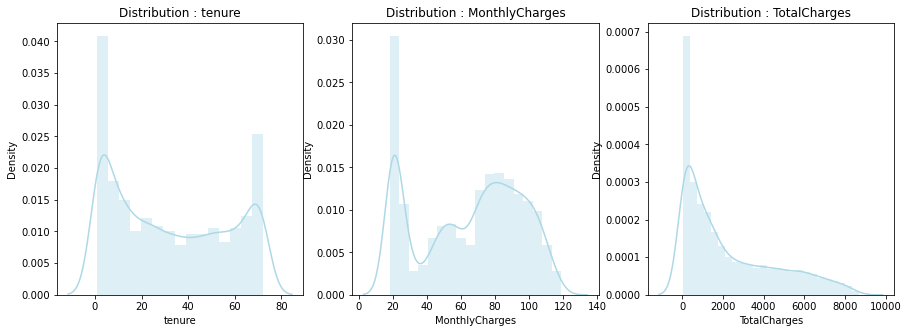

tenure has skewness = 0.23773083190513133
MonthlyCharges has skewness = -0.22210292770166232
TotalCharges has skewness = 0.9616424997242504


In [94]:
fig, ax = plt.subplots(nrows = 1 , ncols = 3 , figsize = (15 , 5))
for i in range(len(numerical_features)):
    plt.subplot(1 , 3 , i + 1)
    sns.distplot(df1[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()
num_cols = ["tenure" , "MonthlyCharges" , "TotalCharges"]
for col in (num_cols):
    print(f"{col} has skewness = {df1[col].skew()}")

- **tenure** and **MonthlyCharges** create a **bimodal distribution** with peaks present at **0 - 70** and **20 - 80** respectively.
- **TotalCharges** displays a **positively or rightly skewed distribution**.

### Numerical Features w.r.t Target Variable (Outcome) :

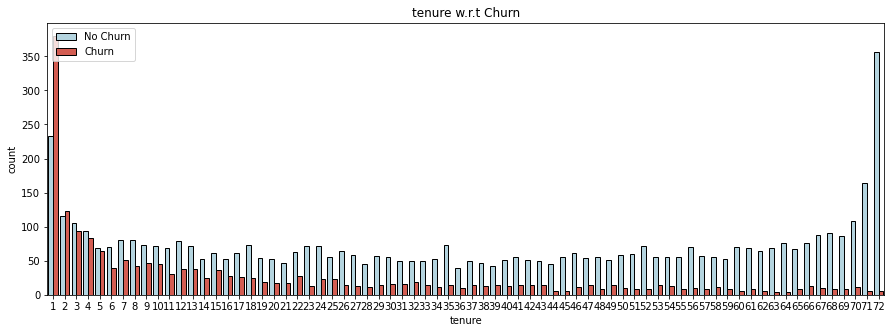

In [95]:
fig, ax = plt.subplots(nrows = 3,ncols = 1,figsize = (15 , 5))
for i in range(1):
    plt.subplot(1 , 1 , i + 1)
    sns.countplot(numerical_features[i],data = df1,hue = "Churn",palette = colors,edgecolor = 'black')
    plt.legend(['No Churn','Churn'],loc = 'upper left')
    title = numerical_features[i] + ' w.r.t Churn'
    plt.title(title);

- Considering **tenure**, a high number of customers have left after the 1st month. This high cancellation of services continues for **4 - 5** months but the churn customers have reduced since the 1st month. As the **tenure** increases, customers dropping out decreases. 
- This results in low customer churning as the **tenure** increases.
- Here, due to unique points, divide the data points of the numerical features by 5 or 500 and assign its quotient value as the representative constant for that data point.

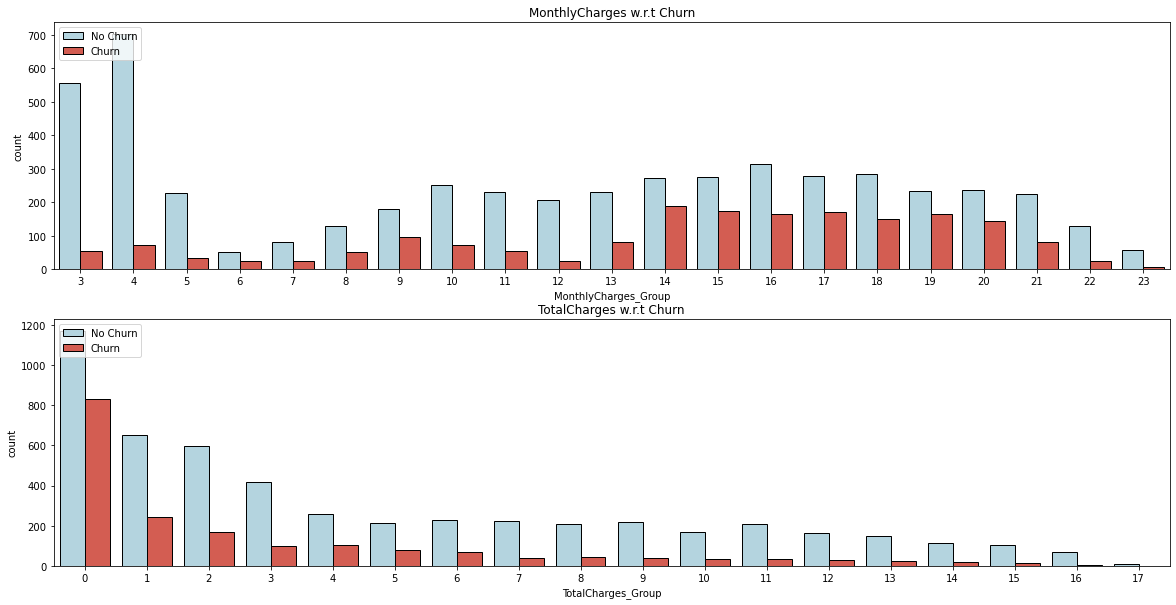

In [96]:
df1['MonthlyCharges_Group'] = [int(i / 5) for i in df1['MonthlyCharges']]
df1['TotalCharges_Group'] = [int(i / 500) for i in df1['TotalCharges']]

fig, ax = plt.subplots(nrows = 2,ncols = 1,figsize = (20,10))
for i in range(len(numerical_features[1:])):
    plt.subplot(2,1,i+1)
    sns.countplot(numerical_features[1 + i]+'_Group',data = df1,hue = "Churn",palette = colors,edgecolor = 'black')
    plt.legend(['No Churn','Churn'],loc = 'upper left')
    title = numerical_features[1 + i] + ' w.r.t Churn'
    plt.title(title);

- For **MonthlyCharges** group, churn rate is high for the values between **65** (13x5) - **105** (21x5). This **MonthlyCharges** range of values caused the customers to switch.
- A very high number of customers opted out of the services for the **TotalCharges** below **500**. This customer churning continues for a **TotalCharges** range of values from **0** (0x500) - **1000** (2x500). 

# Outliers

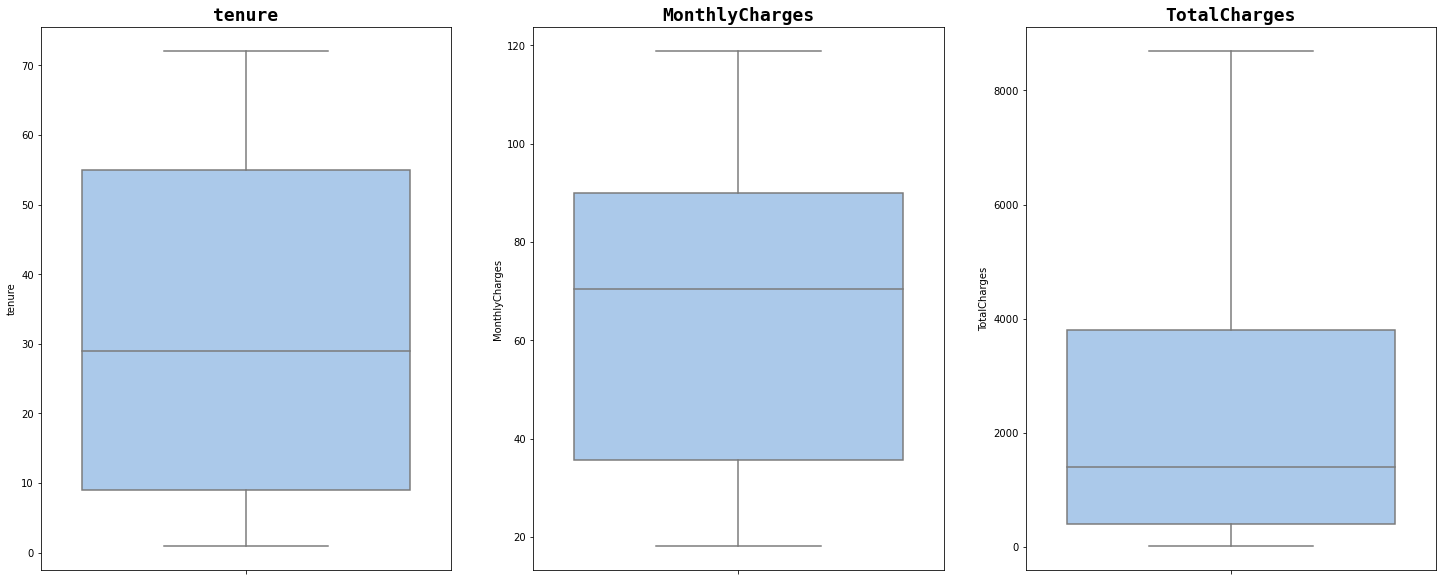

In [97]:
# Draw boxplots to investigate outliers

fig, ax = plt.subplots(1, 3, figsize = (25, 10))


for i in range(len(numerical_features)):
    g = sns.boxplot(data = df1, y = numerical_features[i], ax = ax[i], palette = "pastel")
    g.set_title(numerical_features[i] , weight = "bold", fontsize = 18, fontname = "monospace")

- There are no outliers in the data

# <center><div style="font-family: Trebuchet MS; color: #2D2926; padding: 12px; line-height: 1;">Summary of EDA</div></center>

### Order / Values of features for customer churn cases :
 
- **Categorical Features (Order) :**
    - gender : Male = Female
    - SeniorCitizen : No SeniorCitizen > SeniorCitizen
    - Partner : No Partner > Partner
    - Dependents : No Dependent > Dependent
    - PhoneService : PhoneService > No PhoneService
    - MultipleLines : MultipleLines > No MultipleLines > No PhoneService
    - InternetService : Fiber Optic > DSL > No InternetService
    - OnlineSecurity : Absent > Present > No InternetService
    - OnlineBackup : Absent > Present > No InternetService
    - DeviceProtection : Absent > Present > No InternetService
    - TechSupport : Absent > Present > No InternetService
    - StreamingTV : Absent > Present > No InternetService
    - StreamingMovies : Absent > Present > No InternetService
    - Contract : Month-to-Month > One year > Two year
    - PaperlessBilling : Present > Absent
    - PaymentMethod : Electronic check > Mailed check > Bank Transfer (automatic) > Credit Card (automatic)!
 
 
- **Numerical Features (Range) :**
    - tenure : 1 - 5 months
    - MonthlyCharges : 65 - 105
    - TotalCharges : 0 - 1000
    
**These order / range of values results in customer churn!**

# <center><div style="font-family: Trebuchet MS; color: #2D2926; padding: 12px; line-height: 1;">Feature Engineering</div></center>

### Data Scaling :

In [98]:
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler,StandardScaler

ss = StandardScaler()
# Apply Box-Cox transformation to 'tenure', 'MonthlyCharges', and 'TotalCharges'

df1['TotalCharges'], _ = boxcox(df1['TotalCharges'])

df1['tenure'] = ss.fit_transform(df1[['tenure']])
df1['MonthlyCharges'] = ss.fit_transform(df1[['MonthlyCharges']])
df1['TotalCharges'] = ss.fit_transform(df1[['TotalCharges']])
# Display the transformed dataframe
df1.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_Group,TotalCharges_Group
0,0,0,1,0,-1.28,0,1,0,0,2,...,0,0,0,1,2,-1.16,-1.81,0,5,0
1,1,0,0,0,0.06,1,0,0,2,0,...,0,0,1,0,3,-0.26,0.25,0,11,3
2,1,0,0,0,-1.24,1,0,0,2,2,...,0,0,0,1,3,-0.36,-1.39,1,10,0
3,1,0,0,0,0.51,0,1,0,2,0,...,0,0,1,0,0,-0.75,0.23,0,8,3
4,0,0,0,0,-1.24,1,0,1,0,0,...,0,0,0,1,2,0.20,-1.25,1,14,0


- **Transformation** : **tenure**, **MonthlyCharges** and **TotalCharges** features are tried to normalize as they displayed a right skewed and bimodal data distribution. But only box cox displayed significant reuslts and that too only on the total charges

- **Standardization** : All numerical features are standardized using StandardScaler since they display low skew

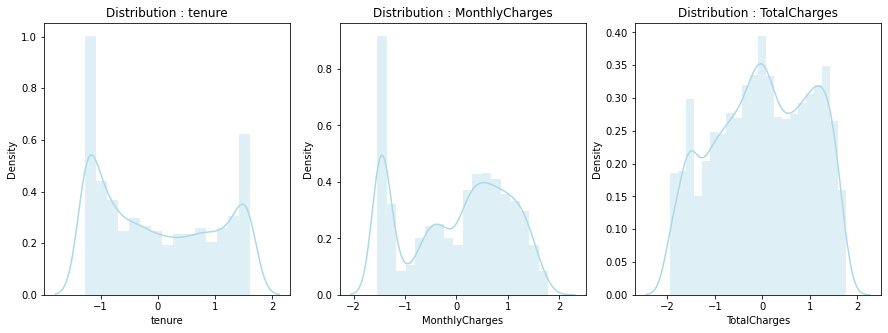

tenure has skewness = 0.23773083190513186
MonthlyCharges has skewness = -0.22210292770166243
TotalCharges has skewness = -0.14575786874026941


In [99]:
fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(len(numerical_features)):
    plt.subplot(1 , 3 , i + 1)
    sns.distplot(df1[numerical_features[i]] , color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
for col in (num_cols):
    print(f"{col} has skewness = {df1[col].skew()}")

### Correlation Matrix :

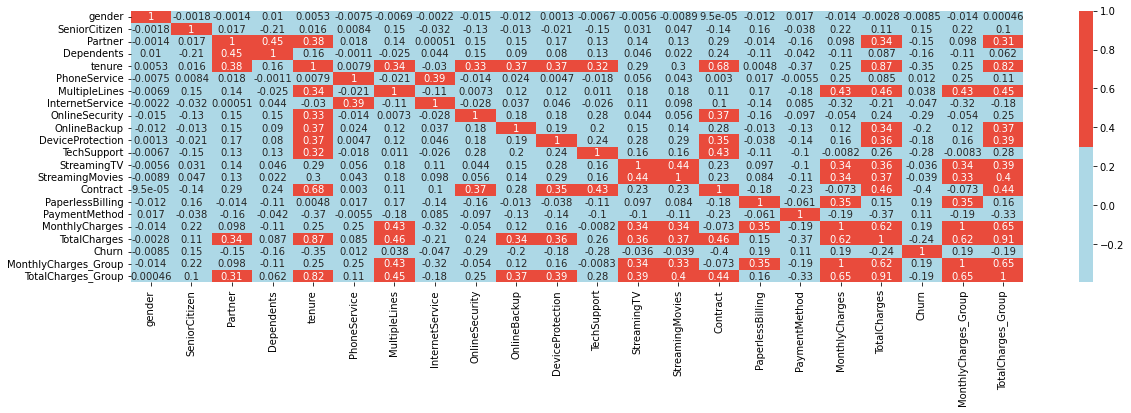

In [100]:
plt.figure(figsize = (20,5))
sns.heatmap(df1.corr(),cmap = colors,annot = True);

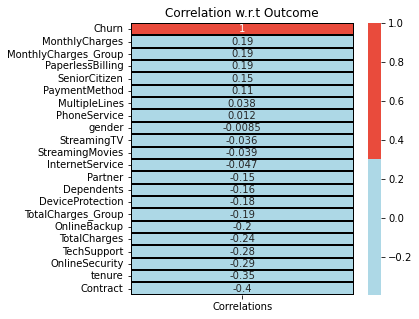

In [101]:
corr = df1.corrwith(df1['Churn']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Outcome');

- **MulipleLines**, **PhoneService**, **gender**, **StreamingTV**, **StreamingMovies** and **InternetService** does not display any kind of correlation. Dropping the features with correlation coefficient between **(-0.1,0.1)**.
- Rest display a significant **positive or negative correlation**.

In [102]:
df1.drop(columns = ['PhoneService', 'gender','StreamingTV','StreamingMovies','MultipleLines','InternetService'],inplace = True)
print(df1.shape)
df1.head()

(7032, 16)


,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_Group,TotalCharges_Group
0,0,1,0,-1.28,0,2,0,0,0,1,2,-1.16,-1.81,0,5,0
1,0,0,0,0.06,2,0,2,0,1,0,3,-0.26,0.25,0,11,3
2,0,0,0,-1.24,2,2,0,0,0,1,3,-0.36,-1.39,1,10,0
3,0,0,0,0.51,2,0,2,2,1,0,0,-0.75,0.23,0,8,3
4,0,0,0,-1.24,0,0,0,0,0,1,2,0.20,-1.25,1,14,0


# <center><div style="font-family: Trebuchet MS; color: #2D2926; padding: 12px; line-height: 1;">Modeling</div></center>

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
from sklearn.cluster import KMeans

In [104]:
x_train, x_test, y_train, y_test = train_test_split(df1.iloc[:,:13] , df1.iloc[:,13] , test_size = 0.20, random_state = 42)

# Linear Regression

In [105]:
from sklearn.linear_model import LinearRegression

# create a LinearRegression object
lr_model = LinearRegression()

# fit the model to the data
lr_model.fit(x_train, y_train)

# make predictions on the test set
y_pred = lr_model.predict(x_test)

# Mean Square Error (MSE)
mse = np.mean((y_test - y_pred) ** 2)
print("Mean Square Error (MSE):", mse)

# Total Variance of y or SST (Sum Squared Total)
sst = np.mean((y_test - np.mean(y_test)) ** 2)
print("Total Variance of y or SST (Sum Squared Total):", sst)

# Variance of Predicted output y or SSR (Sum Squared Regression)
ssr = np.mean((y_pred - np.mean(y_test)) ** 2)
print("Variance of Predicted output y or SSR (Sum Squared Regression):", ssr)

# Variance of Prediction Error e or SSE (Sum Squared Error)
sse = np.mean((y_test - y_pred) ** 2)
print("Variance of Prediction Error e or SSE (Sum Squared Error):", sse)

# Coefficient of Determination R
r2 = 1 - (sse/sst)
print("Coefficient of Determination R:", r2)
print("Coefficients:", lr_model.coef_)
print("Intercept:", lr_model.intercept_)

Mean Square Error (MSE): 0.14337594033462855
Total Variance of y or SST (Sum Squared Total): 0.19515681820363168
Variance of Predicted output y or SSR (Sum Squared Regression): 0.059267973912102874
Variance of Prediction Error e or SSE (Sum Squared Error): 0.14337594033462855
Coefficient of Determination R: 0.2653295864609435
Coefficients: [ 0.07302978  0.01399834 -0.0251642   0.12687101 -0.047572   -0.02350047
 -0.00874746 -0.04592891 -0.06821298  0.04459604  0.00333232  0.22650152
 -0.3040864 ]
Intercept: 0.37427197759284825


- Linear regression assumes a linear relationship between the independent variables and the dependent variable, and the residual errors should be normally distributed with constant variance. However, in the given dataset, there are categorical variables, and the relationship between the independent variables and the dependent variable is not necessarily linear. Therefore, linear regression is not suitable for modelling this data.

- The Mean Square Error (MSE) is 0.1567, which indicates that the model's predictions have a high variance in the application of prediciting 0 & 1, and there is a significant difference between the predicted values and the actual values. Also, the Coefficient of Determination (R-squared) value is 0.3731, which implies that only 37.31% of the variance in the target variable is explained by the independent variables, which is not sufficient. Thus, the model is not a good fit for the data.

# Logistic Regression

In [106]:
def model_evaluation(classifier , x_test , y_test) : 
    
    # Confusion Matrix
    cm = confusion_matrix(y_test , classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm , annot = labels,cmap = 'Blues',fmt ='')
    plt.show();
    # Classification Report
    print(classification_report(y_test , classifier.predict(x_test)))

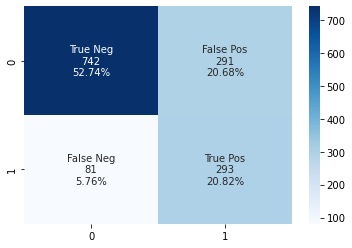

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1033
           1       0.50      0.78      0.61       374

    accuracy                           0.74      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.80      0.74      0.75      1407


Logistic Regression Coefficients:
[[ 0.33454883  0.10138462 -0.2620624   0.39179287 -0.27424889 -0.09284571
  -0.01336905 -0.2504019  -0.90079957  0.32393732  0.02852259  1.24204233
  -1.29338451]]

Probability Predictions:
[[0.95146793 0.04853207]
 [0.78525742 0.21474258]
 [0.12259763 0.87740237]
 ...
 [0.72969177 0.27030823]
 [0.5984306  0.4015694 ]
 [0.97360756 0.02639244]]


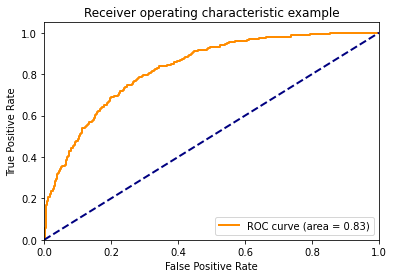

In [107]:
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression(class_weight = "balanced")
classifier_lr.fit(x_train,y_train)
model_evaluation(classifier_lr, x_test, y_test)

# Print weights
print("\nLogistic Regression Coefficients:")
print(classifier_lr.coef_)

# Probability predictions
prob_predictions = classifier_lr.predict_proba(x_test)
print("\nProbability Predictions:")
print(prob_predictions)

# Compute ROC curve and ROC area for each class
probas_ = classifier_lr.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr , tpr , color = 'darkorange' ,
         lw = lw , label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1] , [0, 1], color = 'navy' , lw = lw , linestyle = '--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0 , 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()


- The output (probabilities) is called Soft Predictions. They represent probability of churning and not
- To get the binary "Hard Predictions", we take the probabilities and cut them above a certain threshold
- These metrics indicate that the model is able to identify a high percentage of the churned customers, but it also misclassifies a significant number of non-churned customers as churned.
- However, the area under the ROC curve is 0.83, which indicates that the model performs well in terms of distinguishing between the positive and negative classes.

# K-Means Clustering

In [108]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1 , max_k) :
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    fig = plt.subplots(figsize = (10 , 7))
    plt.plot(means , inertias , 'o-' , color = 'black')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()

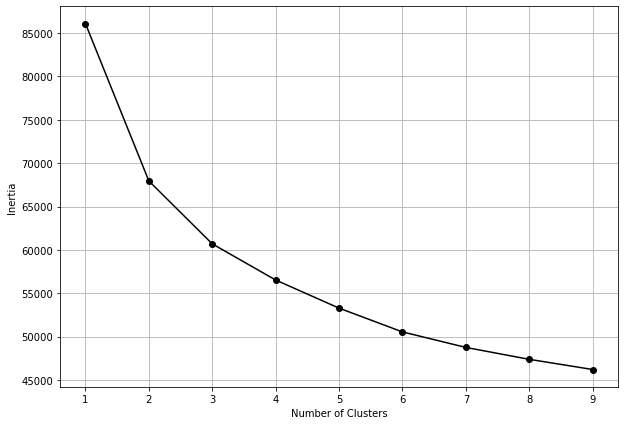

In [109]:
ss = StandardScaler()
# Apply Box-Cox transformation to 'tenure', 'MonthlyCharges', and 'TotalCharges' features
df2['TotalCharges'], _ = boxcox(df2['TotalCharges'])

df2['tenure'] = ss.fit_transform(df2[['tenure']])
df2['MonthlyCharges'] = ss.fit_transform(df2[['MonthlyCharges']])
df2['TotalCharges'] = ss.fit_transform(df2[['TotalCharges']])
df_cluster = df2.copy(deep = True)
#df_cluster.drop(index=12, inplace=True)
optimise_k_means(df_cluster , 10)


4's the optimal number of clusters

In [110]:
# K-Means cluster analysis

kmeans = KMeans(n_clusters = 4 ,  random_state = 42)
kmeans.fit(df_cluster)

# Save cluster group as a column value in our data_frame
df_cluster['Cluster'] = kmeans.labels_

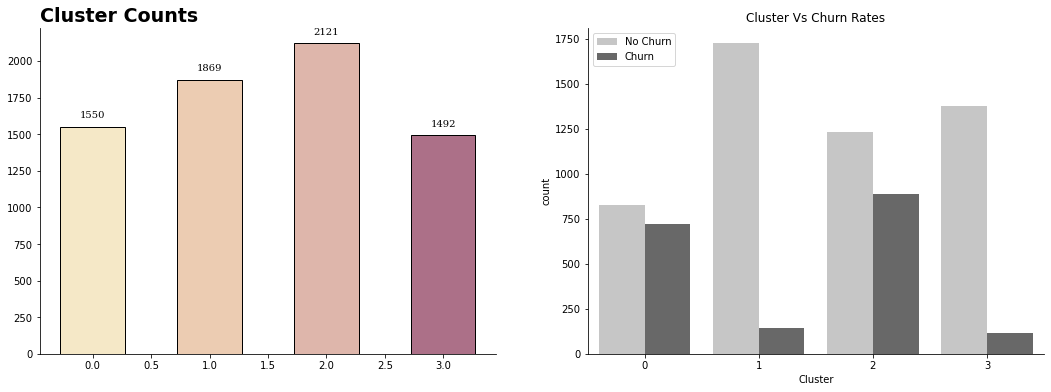

In [111]:
# Cluster Counts
fig, ax = plt.subplots(1 , 2 , figsize = (18 , 6))
data_temp = df_cluster['Cluster'].value_counts().sort_index()
ax[0].bar(data_temp.index, data_temp,
          edgecolor = 'black' , color = ['#F5E8C7' , '#ECCCB2' , '#DEB6AB' , '#AC7088']
       , width=0.55 )
ax[0].set_title('Cluster Counts' , loc = 'left' , fontsize = 19 , fontweight = 'bold')
for i in data_temp.index:
    ax[0].annotate(f"{data_temp[i]}" , 
                   xy = (i, data_temp[i] + 80) ,
                   va = 'center', ha = 'center' , fontweight = 'light' , fontfamily = 'serif' ,
                   color = 'black')
for s in ['top', 'right']:
    ax[0].spines[s].set_visible(False)
    
    
sns.countplot(x = 'Cluster' , hue = "Churn" , palette = "Greys" , data = df_cluster)
sns.despine()
plt.legend(title = '' , loc = 'upper left' , labels = ['No Churn', 'Churn'])
plt.title("Cluster Vs Churn Rates")
plt.show()

<centre><div> 
     </div></centre>
  - Observe Clusters 0 and 2 have a higher Churn Rate compared to Cluster 1 and 3 

 # <div style="font-family: Trebuchet MS; color: #2D2926; padding: 12px; line-height: 1;">Profiling Clusters</div>

Why are indivudals in Cluster 0 and 2 Churning more often than the other Clusters?

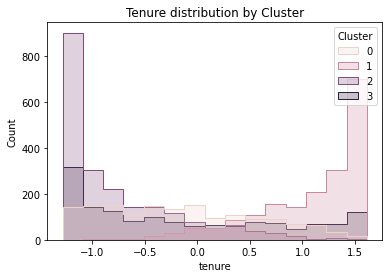

In [112]:
df2['Cluster'] = df_cluster['Cluster']
sns.histplot(data = df2 , x = "tenure" , hue = "Cluster" , element = "step")
plt.title('Tenure distribution by Cluster')
plt.show()

<div> </div>

 - Cluster 0 and 2 have shorter tenure compared to the other clusters



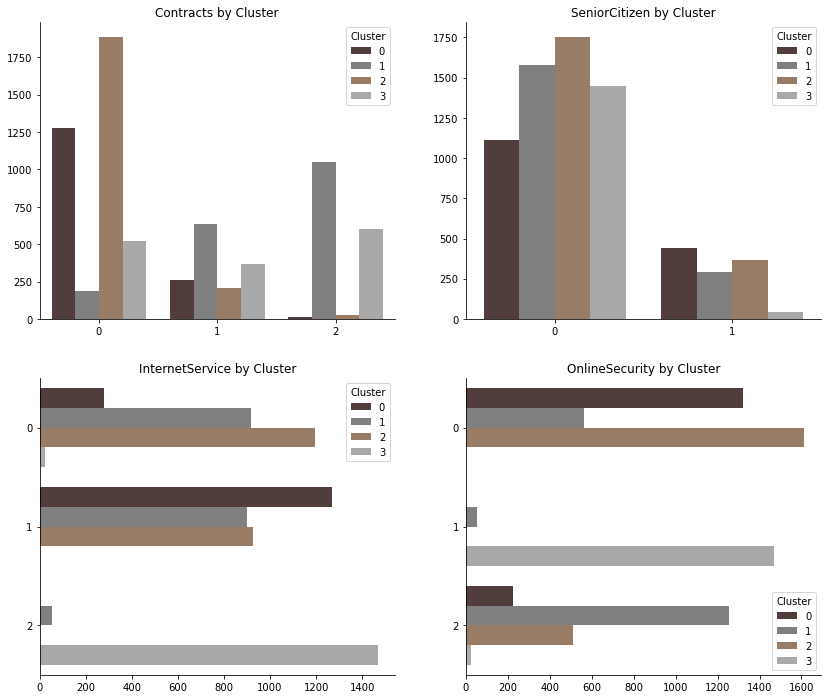

In [113]:
fig, axes = plt.subplots(nrows = 2 , ncols = 2 , figsize = (14 , 12))
sns.despine()

# Gray for No Churn, highlight Churn!
colors = ["#553939", "#808080", "#A27B5C","#A9A9A9"]
# Set custom color palette
sns.set_palette(sns.color_palette(colors))
ax = sns.countplot(x="Contract", hue="Cluster", data=df2, ax = axes[0,0]).set(title='Contracts by Cluster', xlabel=None, ylabel = None)
ax = sns.countplot(x="SeniorCitizen", hue="Cluster", data=df2, ax = axes[0,1]).set(title='SeniorCitizen by Cluster', xlabel=None, ylabel = None)
ax = sns.countplot(y='InternetService', hue="Cluster", data=df2,ax = axes[1,0]).set(title='InternetService by Cluster', xlabel=None, ylabel = None)
ax = sns.countplot(y='OnlineSecurity', hue="Cluster", data=df2, ax = axes[1,1]).set(title='OnlineSecurity by Cluster', xlabel=None, ylabel = None)
sns.despine()

# <div>Clusters 0 and 2 are typically -</div>

- in the Month - to Month Contract
- More likely to be not elderly
- Uses Fiber optic ( cluster 2 customer also uses DSL )
- Does not have Online Security


<div> </div> 
In Conclusion: Cluster analysis is helpful for placing customers into segments using data, 
    which allow businesses to decide which segment(s) to target from distinct marketing mixs that will satisfy the needs 
    and wants of each targeted Cluster. If we have a new customer we can easily determine which cluster he falls in and this can     be used to customize plans for the customers.

 # <center><div style="font-family: Trebuchet MS; color: #2D2926; padding: 12px; line-height: 1;">Measures for Reducing Customer Churn & Increase Revenue</div></center>



-  3 types of customers should be targeted : **SeniorCitizen**, Living with a **Partner**, living all alone!


- The number of **SeniorCitizen** customers are low but their lowerlimit of **MonthlyCharges** is higher than the other customers. Thus, **SeniorCitizen** customers are ready to pay more money but they need to catered with that level of service. 


- Inorder to create a strong foundation of customers, Telco Company needs to create an easy and affordable entry point for their services. For the **tenure** of 1st 6 months, it needs to focus extensively on **OnlineSecurity**, **OnlineBackup**, **DeviceProtection** & **TechSupport** as this period is the most critical and uncertain for the customers.


- Once they build a solid support services for customers, they need to push the usage of **MultipleLines** & **Fiber Optic** cables for the **PhoneService** & **InternetService** respectively. Try to decrease the entry point atleast after which prices can be increased.



- **StreamingTV** and **StreamingMovies** need to be made affordable. The content of these services should be targeting all types of customers. This needs to followed up with an easy and hassle free PaymentMethod.


- Put an end to the **Electronic check** for payment purposes due to it's high churn and focus entirely on **Bank Transfer (automatic)** & **Credit Card (automatic)**!


- Once the **MonthlyCharges** for any single service hits the **70** mark, customers become very conscious about their **MonthlyCharges**. Make it low by providing offers for a certain period of time.

# <center><div style="font-family: Trebuchet MS; color: #2D2926; padding: 12px; line-height: 1;">Conclusion</div></center>

- This is a great dataset that gives an opportunity to peak into the real world business problem and can be dealt with the Data Science techniques. 

- Insights gained from the Data Analysis are very valuable for understanding the effectiveness of the existing systems that are in place. They also assist in drawing up plans & measures to counter the problems or be in an infinite loop fo improvement. 

- We have successfully developed multiple models which helps us in predicting the probability of the customer churning (which helps telecom in acting) and by determining which cluster our customer falls in the 4 clusters formed which helps in type of action plan required to prevent churning.
